# Solvay Digital Society - Business&Decision Hack - Stroke Predictions

##  Comments:

* In the Train DS, Gender ( Male / Female / Other )
* Once the best model found retrain model on entire training DS
* Rather small dataset (+/- 4000 Rows)

## Potential complications:

* Need to handle NaN values in BMI ==> Delete? Use Mean? Use Median? Other Methods...
* Need to handle categorical and numerical values
* Unbalanced dataset can mislead models (very few strokes)
* They are no "Other" gender in the test dataset


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
TrainDS = pd.read_csv('C:/Users/ljacquesdedixmude/streamlit_SP/Data/training-stroke.csv')
TrainDS.drop('id', axis=1, inplace=True)
TestDS = pd.read_csv('C:/Users/ljacquesdedixmude/streamlit_SP/Data/testing-stroke.csv')

In [11]:
d2 = pd.get_dummies(TrainDS, columns = ['Gender', 'Married', 'Employment_Type', 'Urban_Rural', 'Smoker'])
d3 = pd.get_dummies(TestDS, columns = ['Gender', 'Married', 'Employment_Type', 'Urban_Rural', 'Smoker'])
d3.insert(8, "Gender_Other", 0)
d2 = d2.fillna(28.9)
d3 = d3.fillna(28.88)
# We replace NaN values with the mean value of the dataset - normally shouldn't bias results 

In [27]:
d2.describe()

,Age,BodyMassIndex,Hypertension,Had_Heart_Disease,Mean_Glucose_Level,Stroke,Gender_Female,Gender_Male,Gender_Other,Married_No,...,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Urban_Rural_Rural,Urban_Rural_Urban,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,...,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.382642,28.896355,0.096624,0.054550,106.016849,0.048679,0.586106,0.413650,0.000245,0.340509,...,0.003914,0.580969,0.154354,0.130626,0.490705,0.509295,0.299902,0.172701,0.373532,0.153865
std,22.505514,7.671973,0.295482,0.227127,44.771715,0.215223,0.492590,0.492547,0.015640,0.473938,...,0.062446,0.493461,0.361332,0.337032,0.499975,0.499975,0.458271,0.378034,0.483801,0.360863
min,0.080000,10.300000,0.000000,0.000000,55.220000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,23.800000,0.000000,0.000000,77.520000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,28.400000,0.000000,0.000000,92.145000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,32.800000,0.000000,0.000000,114.012500,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,97.600000,1.000000,1.000000,271.740000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
d3.describe()

,Age,BodyMassIndex,Hypertension,Had_Heart_Disease,Mean_Glucose_Level,Gender_Female,Gender_Male,Gender_Other,Married_No,Married_Yes,...,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Urban_Rural_Rural,Urban_Rural_Urban,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.0,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,42.602505,28.881292,0.100783,0.051859,106.670988,0.585127,0.414873,0.0,0.357143,0.642857,...,0.005871,0.538160,0.183953,0.149706,0.497065,0.502935,0.311155,0.175147,0.357143,0.156556
std,23.036795,7.805111,0.301188,0.221851,47.294603,0.492941,0.492941,0.0,0.479392,0.479392,...,0.076434,0.498786,0.387636,0.356958,0.500236,0.500236,0.463193,0.380279,0.479392,0.363559
min,0.160000,14.000000,0.000000,0.000000,55.120000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,23.800000,0.000000,0.000000,76.252500,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,28.100000,0.000000,0.000000,90.350000,1.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,32.700000,0.000000,0.000000,114.657500,1.000000,1.000000,0.0,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,64.400000,1.000000,1.000000,267.600000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
label = 'Stroke'
features = [column for column in d2.columns if column != label]
X = d2[features]
Y = d2[label]

In [29]:
# We split the train dataset with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model #1 Random Forest Classifier

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [31]:
RFC = RandomForestClassifier(bootstrap=True, max_features='auto',min_samples_split = 30, min_samples_leaf = 4, n_estimators=10)
RFC.fit(X_train, y_train)
print(roc_auc_score(y_test, RFC.predict_proba(X_test)[:, 1]))

0.8189352812004391


c:\Users\ljacquesdedixmude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [32]:
balanced_accuracy_score(y_test, RFC.predict(X_test))

0.5

In [33]:
RFC_fpr, RFC_tpr, RFC_thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])

Forest Algo ROC AUC: 0.8189352812004391


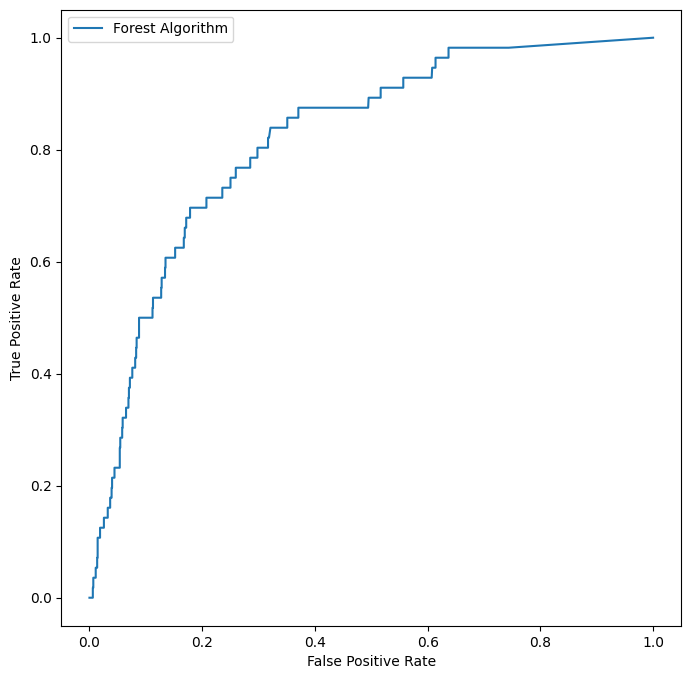

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(RFC_fpr, RFC_tpr, label='Forest Algorithm')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();
print("Forest Algo ROC AUC:", roc_auc_score(y_test, RFC.predict_proba(X_test)[:, 1]))

Confusion matrix:
 [[1171    0]
 [  56    0]]


C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_22756\2477466114.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_22756\2477466114.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


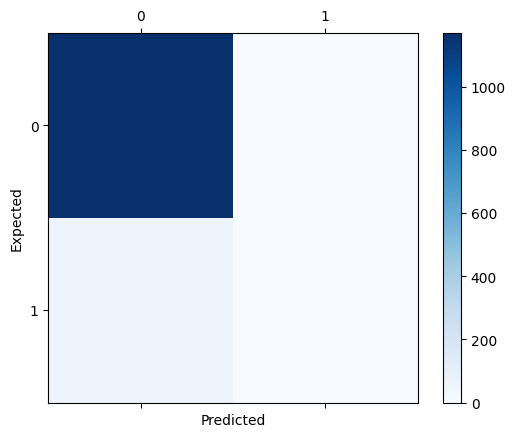

In [35]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=RFC.predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Problem: Model always predict no Stroke

* Generic problem with unbalanced dataset ==> Model trained to always predict noStroke with will most of the time be accurate

## Hyper Parameter Tuning
 
* We can use a gridsearch to find the best hyperparameter to our RandomForest Classifier Model

In [15]:
n_estimators = [800,1000,1200]
max_features = ['sqrt']
max_depth = [30,35,40,45]
max_depth.append(None)
min_samples_split = [40, 50, 60, 70, 80, 90]
min_samples_leaf = [12,14,16,18]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [800, 1000, 1200], 'max_features': ['sqrt'], 'max_depth': [30, 35, 40, 45, None], 'min_samples_split': [40, 50, 60, 70, 80, 90], 'min_samples_leaf': [12, 14, 16, 18], 'bootstrap': [True]}


In [16]:
RF=RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
RFCV = RandomizedSearchCV(RF, random_grid, random_state=0, n_jobs=-1, cv=2, scoring='roc_auc', n_iter=20)
RFCV.fit(X_train, y_train)
#Very time consuming to run the GridSearch !

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [30, 35, 40, 45, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [12, 14, 16, 18],
                                        'min_samples_split': [40, 50, 60, 70,
                                                              80, 90],
                                        'n_estimators': [800, 1000, 1200]},
                   random_state=0, scoring='roc_auc')

In [17]:
print('Best parameters found:\n', RFCV.best_params_)
roc_auc_score(y_test, RFCV.predict_proba(X_test)[:, 1])

Best parameters found:
 {'n_estimators': 1000, 'min_samples_split': 70, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


0.8214534478755514

Confusion matrix:
 [[1168    0]
 [  59    0]]


C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_8912\1552204575.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_8912\1552204575.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


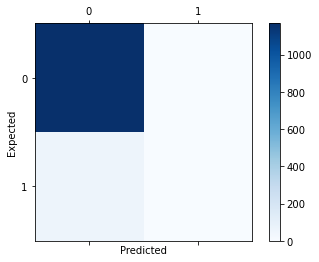

In [18]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=RFCV.predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [19]:
# Best params from gridsearch
# {'n_estimators': 1000, 'min_samples_split': 90, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_depth': 35, 'bootstrap': True}

FA1 = RandomForestClassifier(bootstrap=True, max_features='sqrt',min_samples_split = 90, min_samples_leaf = 14, n_estimators=1000, max_depth=35)
FA1.fit(X_train, y_train)
print(roc_auc_score(y_test, FA1.predict_proba(X_test)[:, 1]))

0.8202345019735314


In [49]:
testid = d3['id']
d3.drop('id', axis=1, inplace=True)

In [40]:
preds = FA1.predict_proba(d3)[:, 1]
preds2 = preds.tolist()
resultDF = pd.DataFrame ({'id':testid, 'Stroke':preds2})
resultDF.to_csv('result.csv', index=False)
print(resultDF)

NameError: name 'FA1' is not defined

## We can use entire Training Set to Fit our Model !

In [24]:
Y.describe()

count    4088.000000
mean        0.048679
std         0.215223
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Stroke, dtype: float64

In [25]:
FA2 = RandomForestClassifier(bootstrap=True, max_features='sqrt',min_samples_split = 60, min_samples_leaf = 18, n_estimators=800)
FA2.fit(X, Y)
print(roc_auc_score(y_test, FA2.predict_proba(X_test)[:, 1]))

0.9023682377524959


In [26]:
preds = FA2.predict_proba(d3)[:, 1]
preds2 = preds.tolist()
resultDF2 = pd.DataFrame ({'id':testid, 'Stroke':preds2})
resultDF2.to_csv('result2.csv', index=False)

In [27]:
print(resultDF2)

                                    id    Stroke
0     07d9152e686ddb50c5330f7f9c1c58bc  0.189726
1     2f0bf07b716733d56ffa0b68cfe3823f  0.059831
2     d63fbf8c3173730f82b150c5ef38b8ff  0.065165
3     d96988b88c76419fad9677dcd6adb947  0.000833
4     142536b9b535b78e681c11b0195d962f  0.000283
...                                ...       ...
1017  da6ea77475918a3d83c7e49223d453cc  0.038321
1018  8686fa633cfb5f49a0609122b9e4140b  0.023329
1019  b294fccdfe95bc7f7dd813216a821a76  0.013088
1020  4cabd4062d563c8027e488a337c34d28  0.013247
1021  6917e6014aa45687457b8e6cf3713515  0.006194

[1022 rows x 2 columns]


In [28]:
# Fitting the model on the entire dataset (obviously) improves the ROCAUC score 
# But it didn't improve the score on kaggle

## Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,   
    max_depth=1, random_state=0).fit(X_train, y_train)

In [19]:
balanced_accuracy_score(y_test, clf.predict(X_test))

0.517164347015525

In [20]:
RFC_fpr, RFC_tpr, RFC_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Forest Algo ROC AUC: 0.8334994053550191


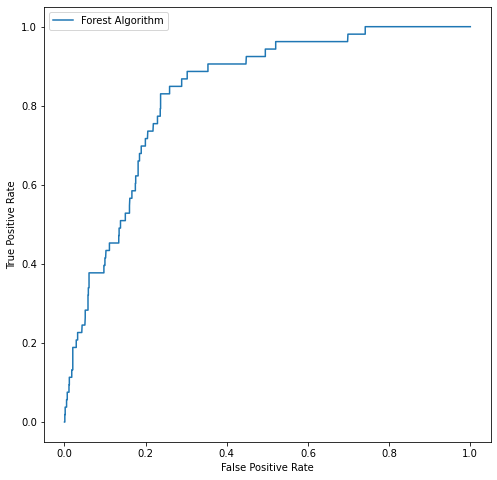

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(RFC_fpr, RFC_tpr, label='Forest Algorithm')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();
print("Forest Algo ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Confusion matrix:
 [[1170    4]
 [  51    2]]


C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_16716\17131138.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ljacquesdedixmude\AppData\Local\Temp\ipykernel_16716\17131138.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


Text(0, 0.5, 'Expected')

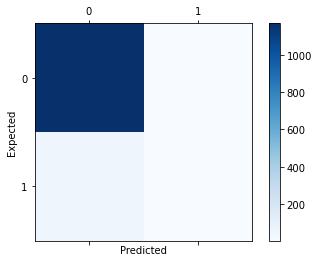

In [24]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## Grid search for Hyperparameters tuning

In [36]:
n_estimators = [100,200,300,400]
max_features = ['sqrt','log2','auto']
max_depth = [1,2,3,4,5]
min_samples_split = [2,4,8,15,20]
min_samples_leaf = [1,2,4,8,10,20,30,40,50]
learning_rate = [0.001,0.002,0.005,0.01,0.02]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['sqrt', 'log2', 'auto'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 4, 8, 15, 20], 'min_samples_leaf': [1, 2, 4, 8, 10, 20, 30, 40, 50], 'learning_rate': [0.001, 0.002, 0.005, 0.01, 0.02]}


In [37]:
clf=GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
clfCV = RandomizedSearchCV(clf, random_grid, random_state=0, n_jobs=-1, cv=3, scoring='roc_auc', n_iter=100)
clfCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.005,
                                                          0.01, 0.02],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10, 20,
                                                             30, 40, 50],
                                        'min_samples_split': [2, 4, 8, 15, 20],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0, scoring='roc_auc')

In [38]:
print('Best parameters found:\n', clfCV.best_params_)
roc_auc_score(y_test, clfCV.predict_proba(X_test)[:, 1])

Best parameters found:
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.01}


0.8408762174150621

In [50]:
TestDS = pd.read_csv('testing-stroke.csv')
d3 = pd.get_dummies(TestDS, columns = ['Gender', 'Married', 'Employment_Type', 'Urban_Rural', 'Smoker'])
d3.insert(8, "Gender_Other", 0)
d3 = d3.fillna(28.88)
d3.drop('id', axis=1, inplace=True)

In [51]:
preds = clfCV.predict_proba(d3)[:, 1]
preds2 = preds.tolist()
resultDF = pd.DataFrame ({'id':testid, 'Stroke':preds2})
resultDF.to_csv('GBCresult.csv', index=False)
print(resultDF)

                                    id    Stroke
0     07d9152e686ddb50c5330f7f9c1c58bc  0.197739
1     2f0bf07b716733d56ffa0b68cfe3823f  0.050047
2     d63fbf8c3173730f82b150c5ef38b8ff  0.062397
3     d96988b88c76419fad9677dcd6adb947  0.011223
4     142536b9b535b78e681c11b0195d962f  0.010754
...                                ...       ...
1017  da6ea77475918a3d83c7e49223d453cc  0.038020
1018  8686fa633cfb5f49a0609122b9e4140b  0.026847
1019  b294fccdfe95bc7f7dd813216a821a76  0.026849
1020  4cabd4062d563c8027e488a337c34d28  0.012628
1021  6917e6014aa45687457b8e6cf3713515  0.014612

[1022 rows x 2 columns]


## We can train the GBC model with best hyperparameter on entire dataset

In [54]:
GBC2 = GradientBoostingClassifier(max_features='sqrt', min_samples_split = 2, min_samples_leaf = 8, n_estimators=200, learning_rate=0.01, max_depth=4)
GBC2.fit(X, Y)
print(roc_auc_score(y_test, GBC2.predict_proba(X_test)[:, 1]))
# Carefull with ROC_AUC interpretation, model is trained on the test set !

0.8773171407782128


In [55]:
preds = GBC2.predict_proba(d3)[:, 1]
preds2 = preds.tolist()
resultDF2 = pd.DataFrame ({'id':testid, 'Stroke':preds2})
resultDF2.to_csv('GBC2.csv', index=False)